# Supervised Learning
(k-NN and Decision Trees)


Regression

In [1]:
import pandas as pd
df = pd.read_csv("w3regr.csv",header=None)
print(f"{df.head()}\n") 

     0           1
0 -5.0  123.867799
1 -4.9   63.138296
2 -4.8    4.163196
3 -4.7   -0.163918
4 -4.6  -33.727488



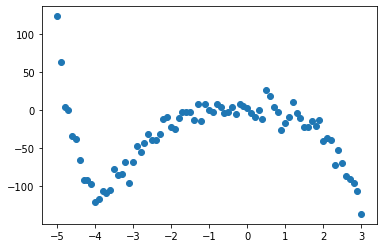

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0:1], df.iloc[:,1:2])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
# Shuffle the dataset
shuffled_data = df.sample(frac=1).reset_index(drop=True)
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(shuffled_data, test_size=0.3)

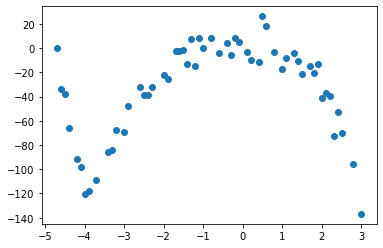

In [5]:
plt.scatter(train_data.iloc[:,0:1], train_data.iloc[:,1:2])

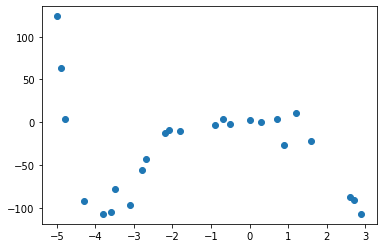

In [6]:
plt.scatter(test_data.iloc[:,0:1], test_data.iloc[:,1:2])

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Normalize the input features
X_train=train_data.iloc[:,0:1];
X_test=test_data.iloc[:,0:1];
y_train=train_data.iloc[:,1:2];
y_test=test_data.iloc[:,1:2];

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


# Create a KNN regressor with K=5
knn = KNeighborsRegressor(n_neighbors=3)
# Fit the model to the training data
knn.fit(X_train,y_train)
# Make predictions on the testing data
y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)

# Evaluate the model using mean squared error
mse1 = mean_squared_error(y_train, y_pred_train)
print("Mean squared error of training:", mse1)
mse2 = mean_squared_error(y_test, y_pred)
print("Mean squared error of test:", mse2)


Mean squared error of training: 106.09768017424896
Mean squared error of test: 1322.1740129320467


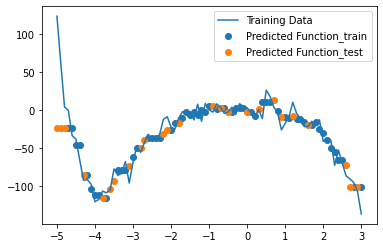

In [38]:
# Plot the training data, testing data, and predicted function
fig, ax = plt.subplots()
ax.plot(df.iloc[:,0:1], df.iloc[:,1:2], label='Training Data')
#ax.scatter(X_train, y_train, label='Test Data')
#ax.scatter(X_test, y_test, label='Test Data')
ax.scatter(X_train,y_pred_train, label='Predicted Function_train')
ax.scatter(X_test,y_pred, label='Predicted Function_test')
plt.legend()
plt.show()

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor with max_depth=3
dt = DecisionTreeRegressor(max_depth=3)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the training and testing data
train_y_pred = dt.predict(X_train)
test_y_pred = dt.predict(X_test)

# Calculate the training and testing loss
train_loss = mean_squared_error(y_train, train_y_pred)
test_loss = mean_squared_error(y_test, test_y_pred)

print("Training loss:", train_loss)
print("Test loss:", test_loss)

Training loss: 194.13504974967262
Test loss: 998.8110977342658


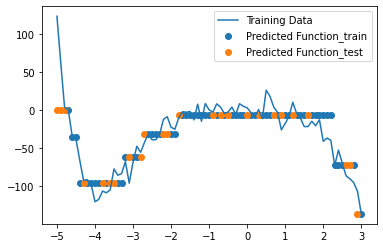

In [42]:
# Plot the training data, testing data, and predicted function
fig, ax = plt.subplots()
ax.plot(df.iloc[:,0:1], df.iloc[:,1:2], label='Training Data')
#ax.scatter(X_train, y_train, label='Test Data')
#ax.scatter(X_test, y_test, label='Test Data')
ax.scatter(X_train,train_y_pred, label='Predicted Function_train')
ax.scatter(X_test,test_y_pred, label='Predicted Function_test')
plt.legend()
plt.show()

Classification

In [43]:
df = pd.read_csv("w3classif.csv",header=None)
print(f"{df.head()}\n") 

          0         1  2
0  0.475861  0.541139  0
1  1.412233 -1.540877  0
2  0.022608 -0.203143  0
3 -0.047869 -0.499965  0
4  1.701335  0.383024  0



In [54]:
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot
x1 = np.array(df.iloc[:,0:1])
x2 = np.array(df.iloc[:,1:2])
x3 = np.array(df.iloc[:,2:3])


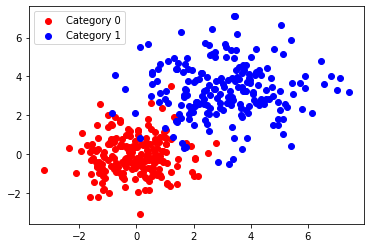

In [75]:
# Separate the data by category
category_0 = np.where(x3 == 0)
category_1 = np.where(x3 == 1)

fig = plt.figure()
plt.scatter(x1[category_0], x2[category_0], c='r', label='Category 0')
plt.scatter(x1[category_1], x2[category_1], c='b', label='Category 1')
plt.legend()
plt.show()

In [56]:
# Shuffle the dataset
shuffled_data = df.sample(frac=1).reset_index(drop=True)
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(shuffled_data, test_size=0.3)

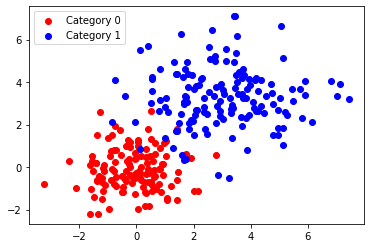

In [76]:
x1_train = np.array(train_data.iloc[:,0:1])
x2_train= np.array(train_data.iloc[:,1:2])
x3_train= np.array(train_data.iloc[:,2:3])

# Separate the data by category
category_0 = np.where(x3_train == 0)
category_1 = np.where(x3_train == 1)


fig = plt.figure()
plt.scatter(x1_train[category_0], x2_train[category_0], c='r', label='Category 0')
plt.scatter(x1_train[category_1], x2_train[category_1], c='b', label='Category 1')
plt.legend()
plt.show()

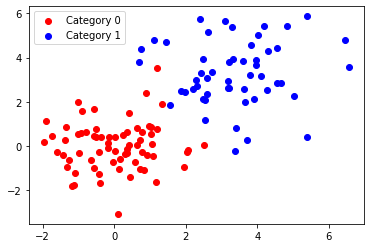

In [77]:
x1_test = np.array(test_data.iloc[:,0:1])
x2_test = np.array(test_data.iloc[:,1:2])
x3_test = np.array(test_data.iloc[:,2:3])

# Separate the data by category
category_0 = np.where(x3_test == 0)
category_1 = np.where(x3_test == 1)

fig = plt.figure()
plt.scatter(x1_test[category_0], x2_test[category_0], c='r', label='Category 0')
plt.scatter(x1_test[category_1], x2_test[category_1], c='b', label='Category 1')
plt.legend()
plt.show()

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train=np.column_stack((x1_train, x2_train))
y_train=x3_train
X_test=np.column_stack((x1_test, x2_test))
y_test=x3_test

# Build the k-NN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn.fit(X_train, y_train.ravel())

# Predict the categories for the training and testing data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate the training and testing misclassification rates
train_error_rate = 1 - train_accuracy
test_error_rate = 1 - test_accuracy


print("Training Misclassification Rate: {:.4f}".format(train_error_rate))
print("Testing Misclassification Rate: {:.4f}".format(test_error_rate))

Training Misclassification Rate: 0.0321
Testing Misclassification Rate: 0.0250


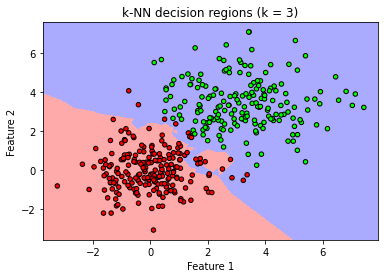

In [86]:
from matplotlib.colors import ListedColormap
X=np.column_stack((x1, x2))

# Generate a meshgrid of points to cover the feature space
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the points in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')

# Plot the training data points
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-NN decision regions (k = %d)' % k)
plt.show()


In [88]:
from sklearn.tree import DecisionTreeClassifier

# Build the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate the misclassification rate (i.e. 1 - accuracy) for the training and test sets
train_loss = 1 - accuracy_score(y_train, y_train_pred)
test_loss = 1 - accuracy_score(y_test, y_test_pred)

print("Training misclassification rate:", train_loss)
print("Test misclassification rate:", test_loss)

Training misclassification rate: 0.03214285714285714
Test misclassification rate: 0.033333333333333326


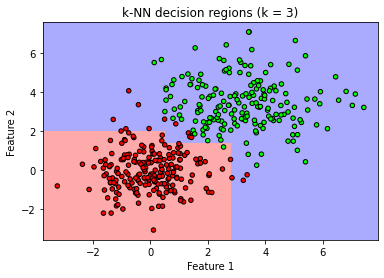

In [89]:
from matplotlib.colors import ListedColormap
X=np.column_stack((x1, x2))

# Generate a meshgrid of points to cover the feature space
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the points in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')

# Plot the training data points
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-NN decision regions (k = %d)' % k)
plt.show()